# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [36]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [37]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [38]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [39]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

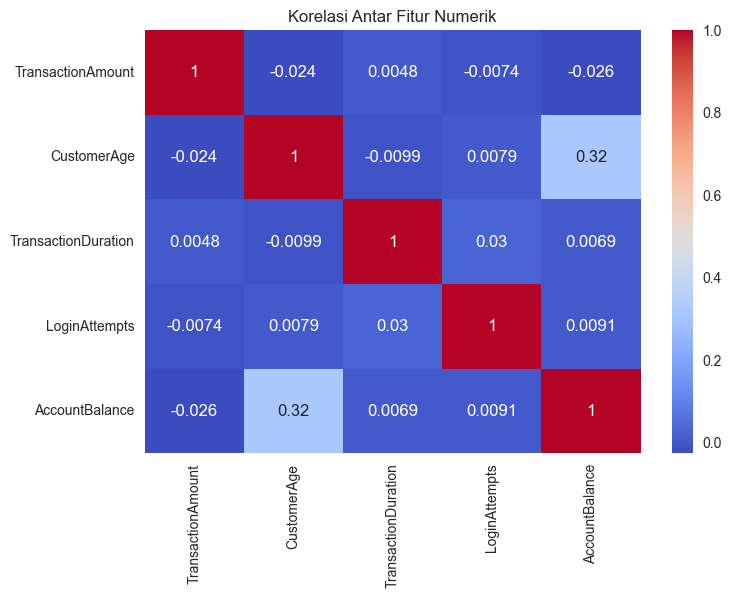

In [40]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
df_numeric = df.select_dtypes(include=np.number)
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

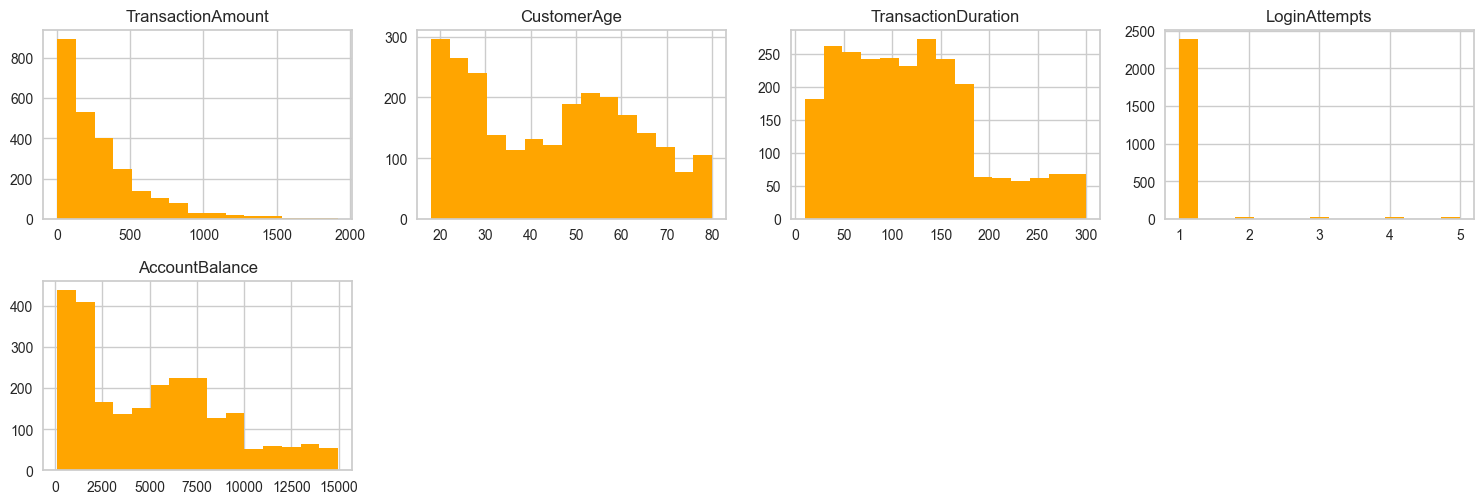

In [41]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df_numeric.hist(bins=15, figsize=(15, 10), layout=(4, 4), color='orange')
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

/var/folders/tb/f700bjm95ml0c4dbr2s18gz40000gp/T/ipykernel_5401/798315157.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CustomerOccupation', y='TransactionAmount', data=df, palette="Set1")


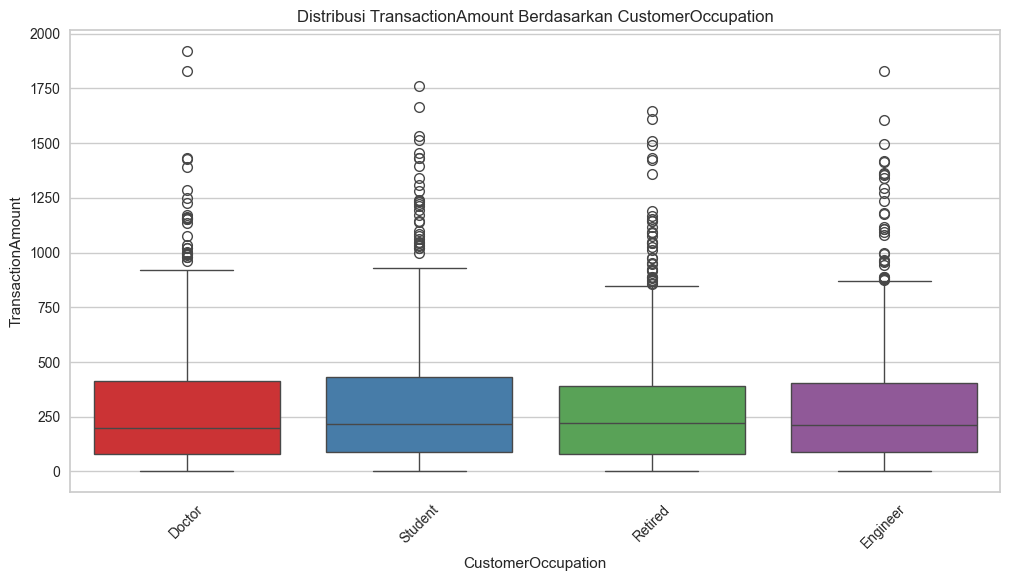

In [42]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
plt.figure(figsize=(12, 6))
sns.boxplot(x='CustomerOccupation', y='TransactionAmount', data=df, palette="Set1")
plt.title('Distribusi TransactionAmount Berdasarkan CustomerOccupation')
plt.xticks(rotation=45)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [43]:
# Mengecek dataset menggunakan isnull().sum()
print("Jumlah nilai null di setiap kolom:")
print(df.isnull().sum())

Jumlah nilai null di setiap kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [44]:
# Mengecek dataset menggunakan duplicated().sum()
print("\nJumlah baris duplikat dalam dataset:")
print(df.duplicated().sum())


Jumlah baris duplikat dalam dataset:
21


In [45]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [46]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'], axis=1)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [47]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [48]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()


['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [49]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()
df.isnull().sum()

TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [50]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
print(df.isnull().sum())

TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [51]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, np.where(df[col] < lower_bound, lower_bound, df[col]))
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.0,2398.000000,2398.000000
mean,0.148038,1256.404921,0.788574,21.383653,1.013344,0.429323,1.532110,0.377521,0.0,0.335330,180.984987
std,0.130359,726.716182,0.437979,12.417622,0.831075,0.287681,1.153802,0.242365,0.0,0.262236,103.757245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.042624,626.250000,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.0,0.093288,92.000000
50%,0.110829,1254.500000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.0,0.308010,181.000000
75%,0.214235,1884.750000,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.0,0.507822,271.750000
max,0.471651,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,360.000000


In [52]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# Binning 'CustomerAge'
bins_age = [0, 25, 40, 60, np.inf]
labels_age = ['Young', 'Adult', 'Middle-Aged', 'Senior']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins_age, labels=labels_age)

# Binning 'TransactionAmount'
bins_amount = [0, 0.25, 0.5, 0.75, np.inf]
labels_amount = ['Low', 'Medium', 'High', 'VeryHigh']
df['AmountGroup'] = pd.cut(df['TransactionAmount'], bins=bins_amount, labels=labels_amount)

# Encode hasil binning
le_age = LabelEncoder()
df['AgeGroup'] = le_age.fit_transform(df['AgeGroup'])

le_amount = LabelEncoder()
df['AmountGroup'] = le_amount.fit_transform(df['AmountGroup'])

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,AmountGroup
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0,0
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,0,0
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,0,0
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0,0
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,1,0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [53]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,AmountGroup
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.0,2398.000000,2398.000000,2398.000000,2398.000000
mean,0.148038,1256.404921,0.788574,21.383653,1.013344,0.429323,1.532110,0.377521,0.0,0.335330,180.984987,0.022936,0.196831
std,0.130359,726.716182,0.437979,12.417622,0.831075,0.287681,1.153802,0.242365,0.0,0.262236,103.757245,0.149730,0.398734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.042624,626.250000,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.0,0.093288,92.000000,0.000000,0.000000
50%,0.110829,1254.500000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.0,0.308010,181.000000,0.000000,0.000000
75%,0.214235,1884.750000,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.0,0.507822,271.750000,0.000000,0.000000
max,0.471651,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,360.000000,1.000000,2.000000


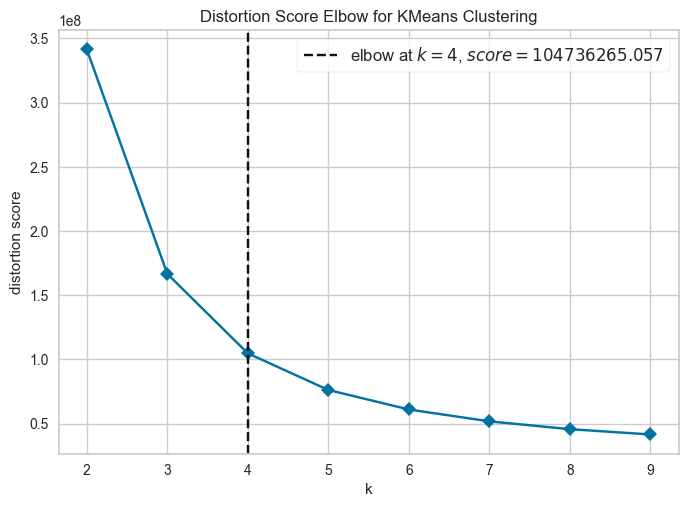

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model_kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_kmeans, k=(2,10), timings=False)
visualizer.fit(df)
visualizer.show()

In [55]:
# Menggunakan algoritma K-Means Clustering
k = visualizer.elbow_value_
model_kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
model_kmeans.fit(df)
df['Cluster'] = model_kmeans.labels_
print(f'Model KMeans dengan {k} Kluster')

Model KMeans dengan 4 Kluster


Jalankan cell code ini untuk menyimpan model kamu.

In [56]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [57]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(df.drop('Cluster', axis=1), df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.49946521747966144


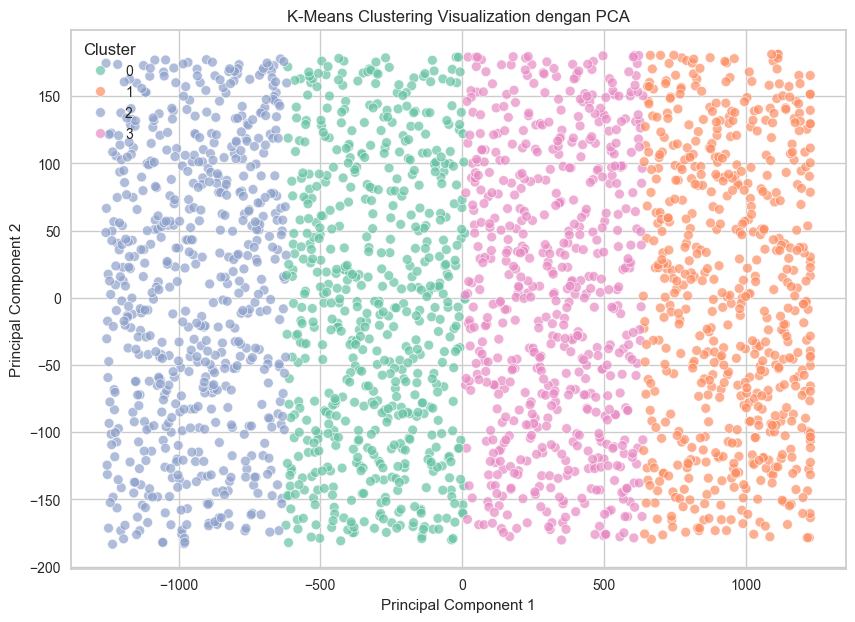

In [58]:
# Membuat visualisasi hasil clustering
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=model_kmeans.labels_, palette='Set2', s=50, alpha=0.7)
plt.title('K-Means Clustering Visualization dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [59]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('Cluster', axis=1))
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
pca_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_pca.fit(pca_df)
pca_df['Cluster'] = kmeans_pca.labels_

In [60]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [61]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
def analyze_result(df):
    clusters = sorted(df['Cluster'].unique())  # agar urut

    for i in clusters:
        cluster_data = df[df['Cluster'] == i]

        mean_account_balance = cluster_data['AccountBalance'].mean()
        min_account_balance = cluster_data['AccountBalance'].min()
        max_account_balance = cluster_data['AccountBalance'].max()

        mean_duration = cluster_data['TransactionDuration'].mean()
        min_duration = cluster_data['TransactionDuration'].min()
        max_duration = cluster_data['TransactionDuration'].max()

        mean_transaction = cluster_data['TransactionAmount'].mean()
        min_transaction = cluster_data['TransactionAmount'].min()
        max_transaction = cluster_data['TransactionAmount'].max()

        mode_channel = cluster_data['Channel'].mode()[0]
        mode_occupation = cluster_data['CustomerOccupation'].mode()[0]

        print(f"""
        Cluster-{i + 1}
            Account Balance → Mean: {mean_account_balance:.2f}, Min: {min_account_balance:.2f}, Max: {max_account_balance:.2f}
            Transaction Duration → Mean: {mean_duration:.2f}, Min: {min_duration:.2f}, Max: {max_duration:.2f}
            Transaction Amount → Mean: {mean_transaction:.2f}, Min: {min_transaction:.2f}, Max: {max_transaction:.2f}
            Mode Channel: {mode_channel}
            Mode Occupation: {mode_occupation}
        """)
display(analyze_result(df))


        Cluster-1
            Account Balance → Mean: 0.33, Min: 0.00, Max: 1.00
            Transaction Duration → Mean: 0.38, Min: 0.00, Max: 0.99
            Transaction Amount → Mean: 0.14, Min: 0.00, Max: 0.47
            Mode Channel: 1
            Mode Occupation: 3
        

        Cluster-2
            Account Balance → Mean: 0.34, Min: 0.00, Max: 1.00
            Transaction Duration → Mean: 0.38, Min: 0.00, Max: 1.00
            Transaction Amount → Mean: 0.14, Min: 0.00, Max: 0.47
            Mode Channel: 2
            Mode Occupation: 1
        

        Cluster-3
            Account Balance → Mean: 0.34, Min: 0.00, Max: 1.00
            Transaction Duration → Mean: 0.37, Min: 0.00, Max: 1.00
            Transaction Amount → Mean: 0.15, Min: 0.00, Max: 0.47
            Mode Channel: 1
            Mode Occupation: 0
        

        Cluster-4
            Account Balance → Mean: 0.33, Min: 0.00, Max: 1.00
            Transaction Duration → Mean: 0.39, Min: 0.00, Max: 1.0

None

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1:**
  - Account Balance (Mean 0.33) → sedikit di bawah rata-rata keseluruhan (kecenderungan saldo sedang–rendah).
  - Transaction Duration (Mean 0.38) → durasi transaksi sedang.
  - Transaction Amount (Mean 0.14) → nilai transaksi cenderung rendah.
  - Mode Channel: 1 → mayoritas menggunakan channel ke-1 (mungkin ATM / Mobile tergantung label).
  - Mode Channel: 1 → mayoritas menggunakan channel ke-1 (mungkin ATM / Mobile tergantung label).

Cluster 1 menggambarkan nasabah dengan saldo menengah ke bawah, transaksi kecil, dan durasi sedang. Mereka lebih sering memakai channel 1.

2. **Cluster 2:**
 - Account Balance (Mean 0.34) → hampir sama dengan cluster 1 (sedikit lebih tinggi).
 - Transaction Duration (Mean 0.38) → sama dengan cluster 1.
 - Transaction Amount (Mean 0.14) → mirip cluster 1.
 - Mode Channel: 2 → lebih banyak menggunakan channel ke-2 (mungkin aplikasi mobile atau online banking).
 - Mode Occupation: 1 → pekerjaan utama kategori 1.

Cluster 2 memiliki profil finansial mirip cluster 1, namun berbeda pada saluran transaksi (channel) dan jenis pekerjaan.
Mungkin ini menggambarkan kelompok dengan perilaku serupa, tapi preferensi channel berbeda.

3. **Cluster 3:**
  - Account Balance (Mean 0.34) → mirip cluster 2.
  - Transaction Duration (Mean 0.37) → sedikit lebih singkat dari cluster lain.
  - Transaction Amount (Mean 0.15) → sedikit lebih tinggi dari cluster 1 & 2.
  - Mode Channel: 1
  - Mode Occupation: 0

Cluster 3 mewakili nasabah dengan saldo dan durasi sedang, tapi frekuensi/nominal transaksi sedikit lebih tinggi.
Mereka menggunakan channel 1 dan umumnya bekerja di kategori 0.

4. **Cluster 4:**
  - Account Balance (Mean 0.33) → hampir sama dengan cluster 1.
  - Transaction Duration (Mean 0.39) → sedikit lebih tinggi.
  - Transaction Amount (Mean 0.16) → tertinggi di antara semua cluster.
  - Mode Channel: 0 
  - Mode Occupation: 3

Cluster 4 tampak sebagai nasabah dengan nilai transaksi relatif paling tinggi meskipun saldonya sama seperti cluster 1.
Mereka lebih sering menggunakan channel 0, dengan pekerjaan kategori 3.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [62]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'Cluster': 'Target'})
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,AmountGroup,Target
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0,0,0
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,0,0,0
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,0,0,0
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0,0,0
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,1,0,0


In [63]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [64]:
# inverse dataset ke rentang normal untuk numerikal
df_inverse = pd.DataFrame(scaler.inverse_transform(df[numerical_cols]), columns=numerical_cols)
# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,AmountGroup,Target
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0,0,0
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,0,0,0
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,0,0,0
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0,0,0
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,1,0,0


In [65]:
# inverse dataset yang sudah diencode ke kategori aslinya.
for col in categorical_cols:
    le = encoders[col]
    df[col] = le.inverse_transform(df[col])

df.head(5)

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,AmountGroup,Target
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08,0,0,0
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35,0,0,0
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04,0,0,0
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06,0,0,0
5,0.047888,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,0.000000,Student,0.558621,0.0,0.045738,2024-11-04 08:06:36,1,0,0


In [66]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
number_cols_inv = df.select_dtypes(include='number').columns.drop('Target')
categorical_cols_inv = df.select_dtypes(include=['object','category']).columns

agg_dict = {col: ['mean','min','max'] for col in number_cols_inv}
agg_dict.update({col: (lambda x: x.mode()[0]) for col in categorical_cols_inv})

cluster_summary_inverse = df.groupby('Target').agg(agg_dict)

with pd.option_context('display.max_columns', None):
  display(cluster_summary_inverse)

TransactionAmount                     CustomerAge            \
                    mean       min       max        mean  min  max   
Target                                                               
0               0.143957  0.000599  0.471651    0.436422  0.0  1.0   
1               0.144250  0.000000  0.471651    0.432340  0.0  1.0   
2               0.147414  0.000313  0.471651    0.412416  0.0  1.0   
3               0.156534  0.000031  0.471651    0.436429  0.0  1.0   

       TransactionDuration                LoginAttempts            \
                      mean  min       max          mean  min  max   
Target                                                              
0                 0.375971  0.0  0.993103           0.0  0.0  0.0   
1                 0.380859  0.0  1.000000           0.0  0.0  0.0   
2                 0.366576  0.0  0.996552           0.0  0.0  0.0   
3                 0.386952  0.0  0.996552           0.0  0.0  0.0   

       AccountBalance                      AgeGroup         AmountGroup      \
                 mean       min       max      mean min max        mean min   
Target                                                                        
0            0.329845  0.000377  0.995087  0.019934   0   1    0.186047   0   
1            0.343853  0.002974  1.000000  0.022034   0   1    0.196610   0   
2            0.336583  0.000064  0.997633  0.018062   0   1    0.190476   0   
3            0.331158  0.000000  0.997144  0.031826   0   1    0.214405   0   

                TransactionDate TransactionType      Location  Channel  \
       max             <lambda>        <lambda>      <lambda> <lambda>   
Target                                                                   
0        1  2023-04-03 17:15:01           Debit  Indianapolis   Branch   
1        2  2023-12-28 17:31:03           Debit    Fort Worth   Online   
2        1  2023-01-02 16:00:06           Debit        Boston   Branch   
3        1  2023-07-12 16:14:08           Debit       Houston      ATM   

       CustomerOccupation PreviousTransactionDate  
                 <lambda>                <lambda>  
Target                                             
0                 Student     2024-11-04 08:07:18  
1                Engineer     2024-11-04 08:07:38  
2                  Doctor     2024-11-04 08:10:23  
3                 Student     2024-11-04 08:12:18

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [67]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_final = pd.concat([df_inverse, df.drop(columns=numerical_cols)], axis=1)
df_final.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate,AgeGroup,AmountGroup,Target
0,14.09,70.0,81.0,1.0,5112.21,2023-04-11 16:29:14,Debit,San Diego,ATM,Doctor,2024-11-04 08:08:08,0.0,0.0,0.0
1,376.24,68.0,141.0,1.0,13758.91,2023-06-27 16:44:19,Debit,Houston,ATM,Doctor,2024-11-04 08:09:35,0.0,0.0,0.0
2,126.29,19.0,56.0,1.0,1122.35,2023-07-10 18:16:08,Debit,Mesa,Online,Student,2024-11-04 08:07:04,0.0,0.0,0.0
3,184.50,26.0,25.0,1.0,8569.06,2023-05-05 16:32:11,Debit,Raleigh,Online,Student,2024-11-04 08:09:06,0.0,0.0,0.0
4,92.15,18.0,172.0,1.0,781.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_final.to_csv('data_clustering_inverse.csv', index=False)

End of Code.